# Real Estate Clean up

This is a real dataset, and it was downloaded using web scraping techniques. The data contains registers from **Fotocasa** which is one of the most popular real estate websites in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro, and in no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [3]:
# TODO
max_price = ds.price.max()
most_expensive = ds[ds['price'] == max_price] # por si se repiten varios
print(f'The house with address {most_expensive["address"].iloc[0]} is the most expensive and its price is {max_price}')

The house with address El Escorial is the most expensive and its price is 8500000


#### Exercise 02. Which is the cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [4]:
# TODO
# Inicialmente se observa que muchos que tienen el precio 0, 
# como es poco probable que el precio de compra sea 0, se filtra
ds_non_zero = ds[ds.price > 0]
# Posteriormente, se observa en la descripción que el siguiente de 600 es un alquiler
min_price_rent = ds_non_zero.price.min()  # minimo alquiler
cheapest_rent_house = ds_non_zero[ds_non_zero['price'] == min_price_rent]
cheapest_rent_house['description']
# Se quitan todos los que en la descripción tengan "alquil"
ds_filtered = ds_non_zero[~ds_non_zero['description'].str.contains("alquil", case=False, na=False)]
min_price_rent = ds_filtered.price.min()
cheapest_house_rent = ds_filtered[ds_filtered['price'] == min_price_rent]
cheapest_house_rent['description']
# Se observan duplicados, se procede a eliminarlos entendiendo que si la descripción está duplicada, todo lo estará
ds_clean = ds_filtered.drop_duplicates(subset='description')
min_price = ds_clean.price.min()
cheapest_house = ds_clean[ds_clean['price'] == min_price]


print(f'The house with addres is {cheapest_house["address"].iloc[0]} the cheapest and its price is {min_price}')


The house with addres is Mayor, Los Santos de la Humosa the cheapest and its price is 16200


#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The biggest house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smallest house is located on County Road 1 N and its surface is 200 meters`

In [5]:
# TODO
# Smallest house
min_surface = ds.surface.min()
min_surface_address = ds[ds['surface'] == min_surface]
print(f'The smallest house is located on {min_surface_address.address.iloc[0]} and its surface is {min_surface}')
# Biggest house
max_surface = ds.surface.max()
max_surface_address = ds[ds['surface'] == max_surface]
print(f'The biggest house is located on {max_surface_address.address.iloc[0]} and its surface is {max_surface}')

The smallest house is located on Calle Amparo,  Madrid Capital and its surface is 15.0
The biggest house is located on Sevilla la Nueva and its surface is 249000.0


#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the names of the populations with a comma as a separator. For example:

`> print(populations)`

`population1, population2, population3, ...`

In [6]:
# TODO
#ds.head(5)
ds.columns
populations = pd.unique(ds['level5'])
concat = ""
for i, population in enumerate(populations):
    if i == len(populations) -1:    # El último
        concat += population
    else:
        concat += population + ","
print(concat)


Arganda del Rey,Fuenlabrada,Boadilla del Monte,Las Rozas de Madrid, Madrid Capital,Villaviciosa de Odón,Pinto,Valdemoro,Navalcarnero,Pozuelo de Alarcón,Torrejón de Ardoz,Navalagamella,San Sebastián de los Reyes,Rivas-vaciamadrid,Alpedrete,Móstoles,San Fernando de Henares,Coslada,Becerril de la Sierra,Alcalá de Henares,Chinchón,Parla,Alcorcón,El Escorial,Leganés,Pedrezuela,Majadahonda,Villanueva de la Cañada,Villanueva del Pardillo,Torrelodones,Moralzarzal,Mejorada del Campo,Aranjuez,Corpa,Getafe,Velilla de San Antonio,Sevilla la Nueva,San Martín de la Vega,Villalbilla,Collado Villalba,Alcobendas,El Molar (Madrid),Moraleja de Enmedio,Algete,Campo Real,Torrejón de la Calzada,Colmenar Viejo,Valdemorillo,Fuente El Saz de Jarama,Tres Cantos,Arroyomolinos (Madrid),Griñón,Paracuellos de Jarama,Guadarrama,Titulcia,Galapagar,Collado Mediano,Los Molinos,San Lorenzo de El Escorial,Loeches,San Martín de Valdeiglesias,Navas del Rey,Bustarviejo,Manzanares El Real,Carabaña,Casarrubuelos,Cercedilla,Fr

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`True` or `False`) followed by the rows/cols that contains NAs.

In [7]:
# TODO
nan = ds.isna()
nan

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
15331,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
15332,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
15333,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


Si que contiene NAs

In [8]:
# Numero total de Na por columna
nan_sum = ds.isna().sum()
nan_sum

Unnamed: 0              0
id_realEstates          0
isNew                   0
realEstate_name        10
phone_realEstate      794
url_inmueble            0
rooms                 353
bathrooms             345
surface              1250
price                   0
date                    0
description           142
address                 0
country                 0
level1                  0
level2                  0
level3                  0
level4               6643
level5                  0
level6              14627
level7               2277
level8               8579
upperLevel              0
countryId               0
level1Id                0
level2Id                0
level3Id                0
level4Id                0
level5Id                0
level6Id                0
level7Id                0
level8Id                0
accuracy                0
latitude                0
longitude               0
zipCode             15335
customZone          15335
dtype: int64

#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions.

In [9]:
# TODO
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


In [10]:
# limpio las 2 columnas que todo es NA
ds_cleaned_columns = ds.dropna(axis=1, how='all') 
ds_cleaned_columns
# limpio las columnas que no tienen al menos 9000 valores NO nulos
ds_cleaned_thresh = ds_cleaned_columns.dropna(axis=1, thresh=9000) 
ds_cleaned_thresh



,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624"
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,0,0,1,"40,28674","-3,79351"
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624"
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624"
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,0,0,"40,45416","-3,70286"
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,0,0,"40,36652","-3,48951"
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,0,0,"40,57444","-3,92124"
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,0,0,"40,36967","-3,48105"


#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value.

In [11]:
# TODO
# Elimino los de precio 0
ds = ds[ds['price'] > 0]
ds_arroyomolinos = ds[ds.level5 == "Arroyomolinos (Madrid)"]
mean_arroy = ds_arroyomolinos['price'].mean()
print(round(mean_arroy,2))

298905.18


#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

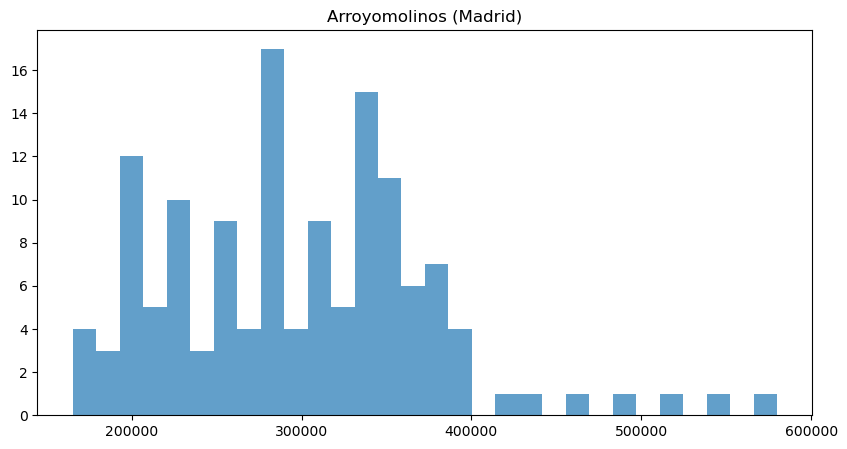

In [12]:
# TODO: Code

plt.figure(figsize=(10,5))
plt.hist(ds_arroyomolinos['price'], bins = 30, alpha = 0.7)
plt.title("Arroyomolinos (Madrid)")
plt.show()  # Para mostrar el gráfico

In [13]:
ds_arroyomolinos['price'].describe()

count       135.000000
mean     298905.177778
std       76672.083974
min      165338.000000
25%      232450.000000
50%      294000.000000
75%      348950.000000
max      580000.000000
Name: price, dtype: float64

Se observa una mayor concentración de precios entre el mínimo de 165338 a los 400000. A excepción de algunas casas que son más caras, se encuentran casi todas cerca de la media.

#### Exercise 09. Are the average prices of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about them.

In [14]:
# TODO
import numpy as np
# VALDEMORILLO
ds_valdemorillo = ds[ds['level5'] == "Valdemorillo"]
ds_valdemorillo.drop_duplicates(subset="description") # Elimino duplicados
std_valdemorillo = np.std(ds_valdemorillo["price"], ddof=1) # Calculo la desviación típica de Valdemorillo
count_valdemorillo = ds_valdemorillo['price'].count()   # N número total de las muestras
error_estandar_valdemorillo = std_valdemorillo/np.sqrt(count_valdemorillo)  # error estandar
print("Media Valdemorillo:", round(ds_valdemorillo["price"].mean(),2))
print("Error estándar Valdemorillo:", round(error_estandar_valdemorillo,2))
# GALAPAGAR
ds_galapagar = ds.loc[ds['level5'] == "Galapagar"]
ds_galapagar = ds_galapagar.drop_duplicates(subset="description")   # Elimino duplicados
std_galapagar = np.std(ds_galapagar["price"], ddof=1)   # Calculo la desviación típica de Galapagar
count_galapagar = ds_galapagar['price'].count()     # N número total de las muestras
error_estandar_galapagar = std_galapagar/np.sqrt(count_galapagar)   # error estandar
print("Media Galapagar:", round(ds_galapagar["price"].mean(),2))
print("Error estándar Galapagar:", round(error_estandar_galapagar,2))


Media Valdemorillo: 363860.29
Error estándar Valdemorillo: 23757.82
Media Galapagar: 355417.45
Error estándar Galapagar: 21551.83


No son iguales, pero son muy similares. Siendo Valdemorillo más caro.

#### Exercise 10. Are the average prices per square meter (price/m2) of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about it.

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [15]:
# Elimino de Valdemorillo los que tengan superficie nan, anteriormente hemos visto que price no tiene ninguno 
# con la variable nan_sum

# VALDEMORILLO
ds_valdemorillo = ds_valdemorillo.dropna(subset=['surface'])
ds_valdemorillo["pps"] = ds_valdemorillo['price']/ds_valdemorillo['surface']
print("Precio medio por metro cuadrado Valdemorillo:",ds_valdemorillo['pps'].mean())
print("Superficie media en Valdemorillo",ds_valdemorillo['surface'].mean())

# GALAPAGAR
ds_galapagar = ds_galapagar.dropna(subset=['surface'])
ds_galapagar["pps"] = ds_galapagar['price']/ds_galapagar['surface']
print("Precio medio por metro cuadrado Valdemorillo:",ds_galapagar['pps'].mean())
print("Superficie media en Valdemorillo",ds_galapagar['surface'].mean())

Precio medio por metro cuadrado Valdemorillo: 1317.9502109024984
Superficie media en Valdemorillo 350.0188679245283
Precio medio por metro cuadrado Valdemorillo: 1573.092217815374
Superficie media en Valdemorillo 317.1666666666667


No, se observa que el precio medio por metro cuadrado en Valdemorillo es más barato. 
Además, se aprecia que en media hay más superficie en dicha población.

#### Exercise 11. Analyze the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot`, then write a conclusion about it.

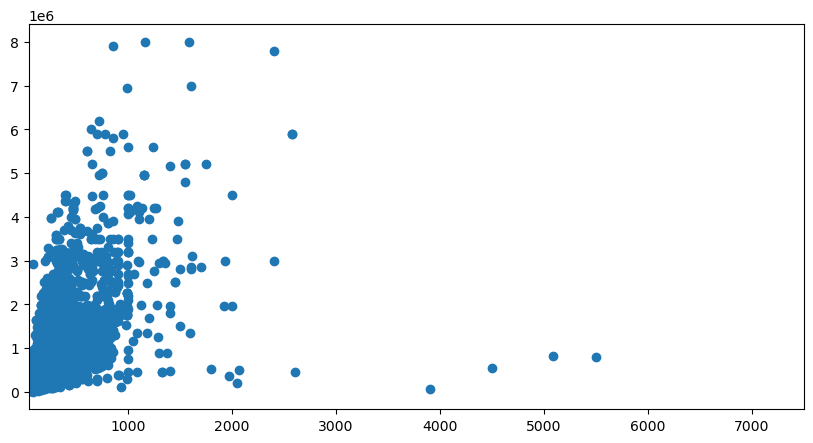

In [16]:
ds_filter = ds[(ds['surface'] > 0) & (ds['price'] > 0)]
x1 = ds_filter['surface']
y1 = ds_filter['price']

plt.figure(figsize=(10,5))
plt.scatter(x1,y1)
plt.xlim(40,7500)   # zoom
plt.show()  # Para mostrar el gráfico

Se observa una tendencia de a mayor superficie mayor incremento en el precio en gran parte de las casas. Además, se observa que algunos de los más alejados en la superficie no siguen la tendencia de aumentar de precio, por lo que deben de ser terrenos. Se ha hecho zoom ya que había algunos que tenían una superficie tan elevada que impedían ver el gráfico con claridad.

#### Exercise 12. How many real estate agencies does the dataset contain? (★★☆)

Print the obtained value.

In [17]:
# TODO
ds_filtered = ds.dropna(subset="realEstate_name")
len(ds_filtered.groupby('realEstate_name'))


1816

#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses.

In [18]:
# TODO
population = ds['level5'].value_counts()
most_populated = population.idxmax()
most_houses = population.max()
print(most_populated,":", most_houses)

 Madrid Capital : 6632


#### Exercise 14. Now let's work with the "south belt" of Madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`.

In [19]:
# TODO
subset_ds = ds["level5"].isin(["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]) # Table of true or false
ds_south_belt = ds[subset_ds]
ds_south_belt

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
85,86,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,...,0,0,0,0,0,1,"40,35059","-3,82693",NaN,NaN
94,95,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000,...,0,0,0,0,0,0,"40,31933","-3,77574",NaN,NaN
109,110,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000,...,0,0,0,0,0,0,"40,3313411","-3,8313868",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,15276,153903887,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,1.0,78.0,138000,...,0,0,0,0,0,1,"40,31381","-3,83733",NaN,NaN
15291,15292,151697757,False,unipiso,912788631.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,2.0,110.0,279000,...,0,0,0,0,0,0,"40,3259051","-3,76318",NaN,NaN
15305,15306,153902389,False,jadein ferrero,914871639.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,85.0,170000,...,0,0,0,0,0,0,"40,2882193","-3,8098617",NaN,NaN
15322,15323,153871864,False,gestion comercial,911220662.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,91.0,112000,...,0,0,0,0,0,0,"40,28282","-3,78892",NaN,NaN


#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in Exercise 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot.

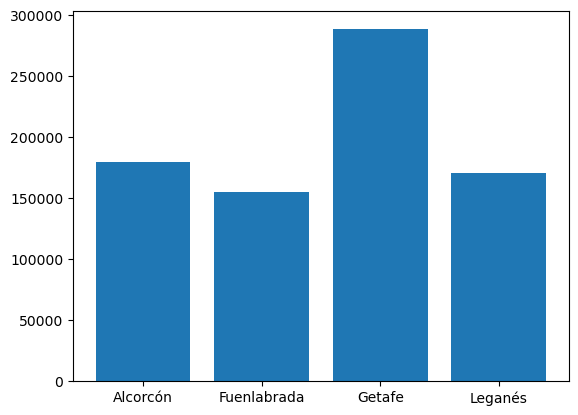

In [20]:
# TODO: Code
median_prices = ds_south_belt.groupby('level5')['price'].median()
plt.bar(median_prices.index, median_prices.values)
plt.show()

Se observa que la mediana de precios en Gestafe es mucho mayor respecto a las medianas de Alcorcón, Leganés y Fuenlabrada.En ocasiones la media puede verse afectada por los datos extremos, en cambio la mediana toma la posición del medio de los valores ordenados en un conjunto de datos.

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in Exercise 14) (★★★)

Print both values for each variable.

In [21]:
ds_south_belt = ds_south_belt.dropna(subset=['price','rooms','surface','bathrooms']) # limpio de NAs el dataset
mean_south_belt = ds_south_belt.groupby('level5')[['price','rooms','surface','bathrooms']].mean()   # media
variance_south_belt = ds_south_belt.groupby('level5')[['price','rooms','surface','bathrooms']].var()    # varianza
print("Mean:\n",mean_south_belt,"\n")
print("Variance\n",variance_south_belt)

Mean:
                      price     rooms     surface  bathrooms
level5                                                     
Alcorcón     236599.415205  2.894737  106.315789   1.649123
Fuenlabrada  181444.139896  3.025907  103.678756   1.471503
Getafe       267422.030568  3.165939  126.152838   1.816594
Leganés      210548.057143  2.908571  105.817143   1.537143 

Variance
                     price     rooms      surface  bathrooms
level5                                                     
Alcorcón     1.694116e+10  1.012384  4279.664396   0.617337
Fuenlabrada  4.966795e+09  0.389950  2297.479598   0.365069
Getafe       1.954388e+10  0.630238  5988.998468   0.667969
Leganés      1.238980e+10  0.819179  4010.173268   0.583383


#### Exercise 17. What is the most expensive house in each population? You must use the subset obtained in Exercise 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population.

In [22]:
# TODO
ds_south_belt[['price','address']]

,price,address
3,89000,"Barrio San Andres, Fuenlabrada"
85,107000,"Avenida Carabancheles, 18, Alcorcón"
94,320000,"Avenida Los Pinos, Leganés"
109,425000,Alcorcón
161,239500,Fuenlabrada
...,...,...
15275,138000,"Urbanización Urbanización Parque Miraflores, 5..."
15291,279000,Leganés
15305,170000,Fuenlabrada
15322,112000,"Calle Dr. Miguel de Aguado, Fuenlabrada"


#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in Exercise 14) (★★★)

For the normalization method, you can use the one you consider; there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot.

Hint: You can help yourself by reviewing the *multihist* demo of Matplotlib.

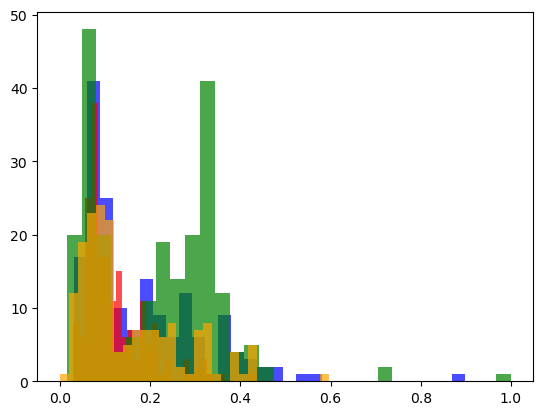

In [23]:
import matplotlib.pyplot as plt
ds_normalized = ds_south_belt.copy()
# Normalización Min-Max
for col in ds_south_belt.select_dtypes(include=['number']).columns:
    X_min = ds_south_belt[col].min()
    X_max = ds_south_belt[col].max()
    # Xnorm = (x - Xmin)/(Xmax-Xmin)
    ds_normalized[col] = ((ds_south_belt[col]) - X_min) / (X_max - X_min)
# Filtro el Dataset por poblaciones
ds_norm_alcorcon = ds_normalized.loc[ds_normalized['level5'] == 'Alcorcón', 'price']
ds_norm_fuenlabrada = ds_normalized.loc[ds_normalized['level5'] == 'Fuenlabrada', 'price']
ds_norm_getafe = ds_normalized.loc[ds_normalized['level5'] == 'Getafe', 'price']
ds_norm_leganes = ds_normalized.loc[ds_normalized['level5'] == 'Leganés', 'price']
# Plot
plt.hist(ds_norm_alcorcon, bins=30, alpha=0.7, color='blue')
plt.hist(ds_norm_fuenlabrada, bins=30, alpha=0.7, color='red')
plt.hist(ds_norm_getafe, bins=30, alpha=0.7, color='green')
plt.hist(ds_norm_leganes, bins=30, alpha=0.7, color='orange')
plt.show()

Se observa gran parte de los datos concentrados entre 0 y 0,5. Siendo los cercanos al 0 donde están más concentrados y se reducen al acercarse al 1.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in Exercise 14 (★★☆)

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [24]:
ds_south_belt = ds_south_belt.copy()
# Para prevenir el error de SettingWithCopyWarning, ocurre al intentar asignar valores a una vista de un DataFrame en lugar de a una copia. 
# Esto sucede cuando el DataFrame ha sido generado a partir de un subconjunto de otro DataFrame usando un filtro
ds_south_belt['pps'] = round(ds_south_belt['price']/ds_south_belt['surface'],2) # nueva columna price per square

In [25]:
#Getafe
ds_getafe = ds_south_belt.loc[ds_south_belt['level5'] == "Getafe", 'pps']
ds_getafe.describe()

count     229.000000
mean     2174.593668
std       585.532202
min      1196.670000
25%      1720.450000
50%      2060.610000
75%      2643.240000
max      3827.160000
Name: pps, dtype: float64

In [26]:
ds_alcorcon = ds_south_belt.loc[ds_south_belt['level5'] == "Alcorcón", 'pps']
ds_alcorcon.describe()

count     171.000000
mean     2242.940643
std       542.021920
min       604.760000
25%      1908.560000
50%      2208.590000
75%      2475.680000
max      3698.160000
Name: pps, dtype: float64

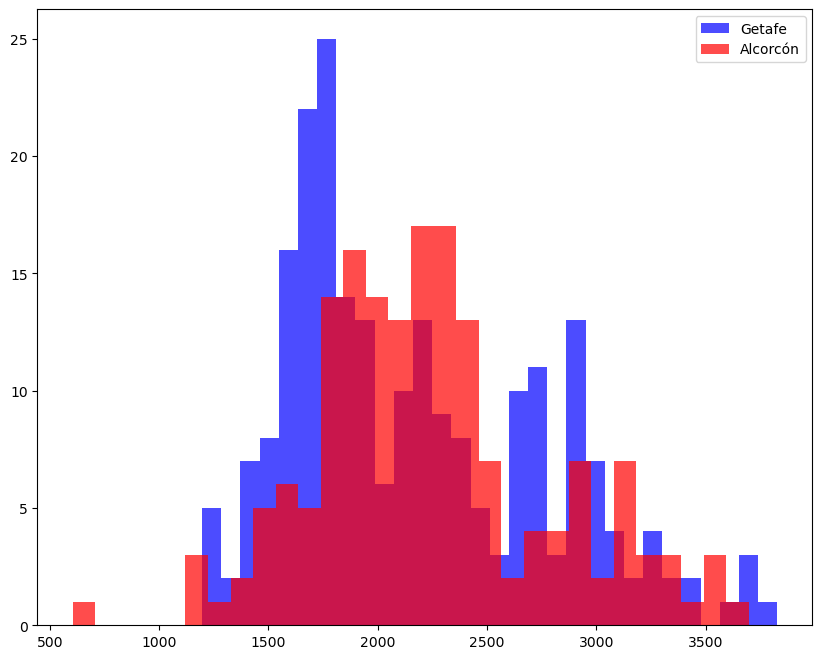

In [27]:
plt.subplots(1,1, figsize=(10,8))
plt.hist(ds_getafe, bins=30, alpha=0.7, color="blue")
plt.hist(ds_alcorcon, bins=30, alpha=0.7, color="red")
plt.legend(("Getafe","Alcorcón"))
plt.show()

El precio en Getafe en media por metro cuadrado es de 2174.59€, por otro lado, en Alcorcón el precio en media por metro cuadrado es de 2242.94€.

#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph. You must use the subset obtained in Exercise 14 (★★☆)
 
Hint: Make a scatter plot of each population using subplots.

In [28]:
# TODO

#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in Exercise 14) (★★★★)

Execute the following cell, and then start coding in the next one. You must implement a simple code that transforms the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [5]:
from ipyleaflet import Map, basemaps
# Map centered on (40.4168 degrees latitude and -3.7038 degrees longitude)
# Latitude, longitude
map = Map(center = (40.4168, -3.7038), zoom = 10, min_zoom = 1, max_zoom = 20, basemap=basemaps.OpenStreetMap.Mapnik)
map

ModuleNotFoundError: No module named 'ipyleaflet'

In [ ]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:
